In [525]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [526]:
#Read in the csv file and convert to a Pandas dataframe

df15=pd.read_csv('2015.csv')
df16=pd.read_csv('2016.csv')
df17=pd.read_csv('2017.csv')
df18=pd.read_csv('2018.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [527]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [528]:
df15 = df15.rename(columns={'Happiness Rank': 'Rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust'}) #rename 

print(df15)

         Country                           Region  Rank  Score  \
0    Switzerland                   Western Europe     1  7.587   
1        Iceland                   Western Europe     2  7.561   
2        Denmark                   Western Europe     3  7.527   
3         Norway                   Western Europe     4  7.522   
4         Canada                    North America     5  7.427   
..           ...                              ...   ...    ...   
153       Rwanda               Sub-Saharan Africa   154  3.465   
154        Benin               Sub-Saharan Africa   155  3.340   
155        Syria  Middle East and Northern Africa   156  3.006   
156      Burundi               Sub-Saharan Africa   157  2.905   
157         Togo               Sub-Saharan Africa   158  2.839   

     Standard Error      GDP   Family   Health  Freedom    Trust  Generosity  \
0           0.03411  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1           0.04884  1.30232  1.40223  0.94784 

In [529]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [530]:
df16 = df16.rename(columns={'Happiness Rank': 'Rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust'}) #rename 

print(df16)

         Country                           Region  Rank  Score  \
0        Denmark                   Western Europe     1  7.526   
1    Switzerland                   Western Europe     2  7.509   
2        Iceland                   Western Europe     3  7.501   
3         Norway                   Western Europe     4  7.498   
4        Finland                   Western Europe     5  7.413   
..           ...                              ...   ...    ...   
152        Benin               Sub-Saharan Africa   153  3.484   
153  Afghanistan                    Southern Asia   154  3.360   
154         Togo               Sub-Saharan Africa   155  3.303   
155        Syria  Middle East and Northern Africa   156  3.069   
156      Burundi               Sub-Saharan Africa   157  2.905   

     Lower Confidence Interval  Upper Confidence Interval      GDP   Family  \
0                        7.460                      7.592  1.44178  1.16374   
1                        7.428                   

In [531]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [532]:
df17 = df17.rename(columns={'Happiness.Rank': 'Rank','Happiness.Score':'Score','Economy..GDP.per.Capita.':'GDP','Health..Life.Expectancy.':'Health','Trust..Government.Corruption.':'Trust'}) #rename 

print(df17)

                      Country  Rank  Score  Whisker.high  Whisker.low  \
0                      Norway     1  7.537      7.594445     7.479556   
1                     Denmark     2  7.522      7.581728     7.462272   
2                     Iceland     3  7.504      7.622030     7.385970   
3                 Switzerland     4  7.494      7.561772     7.426227   
4                     Finland     5  7.469      7.527542     7.410458   
..                        ...   ...    ...           ...          ...   
150                    Rwanda   151  3.471      3.543030     3.398970   
151                     Syria   152  3.462      3.663669     3.260331   
152                  Tanzania   153  3.349      3.461430     3.236570   
153                   Burundi   154  2.905      3.074690     2.735310   
154  Central African Republic   155  2.693      2.864884     2.521116   

          GDP    Family    Health   Freedom  Generosity     Trust  \
0    1.616463  1.533524  0.796667  0.635423    0.36201

In [533]:
df18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [534]:
df15.info

<bound method DataFrame.info of          Country                           Region  Rank  Score  \
0    Switzerland                   Western Europe     1  7.587   
1        Iceland                   Western Europe     2  7.561   
2        Denmark                   Western Europe     3  7.527   
3         Norway                   Western Europe     4  7.522   
4         Canada                    North America     5  7.427   
..           ...                              ...   ...    ...   
153       Rwanda               Sub-Saharan Africa   154  3.465   
154        Benin               Sub-Saharan Africa   155  3.340   
155        Syria  Middle East and Northern Africa   156  3.006   
156      Burundi               Sub-Saharan Africa   157  2.905   
157         Togo               Sub-Saharan Africa   158  2.839   

     Standard Error      GDP   Family   Health  Freedom    Trust  Generosity  \
0           0.03411  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1           0.0

In [535]:
df15.shape

(158, 12)

In [536]:
df15.describe()

,Rank,Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [537]:
df15.columns

Index(['Country', 'Region', 'Rank', 'Score', 'Standard Error', 'GDP', 'Family',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [538]:
df16.info

<bound method DataFrame.info of          Country                           Region  Rank  Score  \
0        Denmark                   Western Europe     1  7.526   
1    Switzerland                   Western Europe     2  7.509   
2        Iceland                   Western Europe     3  7.501   
3         Norway                   Western Europe     4  7.498   
4        Finland                   Western Europe     5  7.413   
..           ...                              ...   ...    ...   
152        Benin               Sub-Saharan Africa   153  3.484   
153  Afghanistan                    Southern Asia   154  3.360   
154         Togo               Sub-Saharan Africa   155  3.303   
155        Syria  Middle East and Northern Africa   156  3.069   
156      Burundi               Sub-Saharan Africa   157  2.905   

     Lower Confidence Interval  Upper Confidence Interval      GDP   Family  \
0                        7.460                      7.592  1.44178  1.16374   
1                

In [539]:
df16.shape


(157, 13)

In [540]:
df16.describe()

,Rank,Score,Lower Confidence Interval,Upper Confidence Interval,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [541]:
df16.columns

Index(['Country', 'Region', 'Rank', 'Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'GDP', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [542]:
df17.info

<bound method DataFrame.info of                       Country  Rank  Score  Whisker.high  Whisker.low  \
0                      Norway     1  7.537      7.594445     7.479556   
1                     Denmark     2  7.522      7.581728     7.462272   
2                     Iceland     3  7.504      7.622030     7.385970   
3                 Switzerland     4  7.494      7.561772     7.426227   
4                     Finland     5  7.469      7.527542     7.410458   
..                        ...   ...    ...           ...          ...   
150                    Rwanda   151  3.471      3.543030     3.398970   
151                     Syria   152  3.462      3.663669     3.260331   
152                  Tanzania   153  3.349      3.461430     3.236570   
153                   Burundi   154  2.905      3.074690     2.735310   
154  Central African Republic   155  2.693      2.864884     2.521116   

          GDP    Family    Health   Freedom  Generosity     Trust  \
0    1.616463  1.53352

In [543]:
df17.shape

(155, 12)

In [544]:
df17.describe()

,Rank,Score,Whisker.high,Whisker.low,GDP,Family,Health,Freedom,Generosity,Trust,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [545]:
df17.columns

Index(['Country', 'Rank', 'Score', 'Whisker.high', 'Whisker.low', 'GDP',
       'Family', 'Health', 'Freedom', 'Generosity', 'Trust',
       'Dystopia.Residual'],
      dtype='object')

In [546]:
df18.info

<bound method DataFrame.info of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874     

In [547]:
df18.shape

(156, 9)

In [548]:
df18.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [549]:
df18.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

In [550]:
#Happiness.Rank is : numerical - continous
#Happiness.Score is : numerical - continous

#Country is : categorical - nominal
#Economy..GDP.per.Capita is : numerical - continous

#Family is : numerical - continous
#Generosity is : numerical - continous

#Trust..Government.Corruption is : numerical - continous
#Dystopia.Residua is : numerical - continous

#Whisker.high is : numerical - continous
#Whisker.low is : numerical - continous

#Health..Life.Expectancy is : numerical - continous
#Freedom is : numerical - continous



In [551]:
#^_^

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [552]:
#in the kaggle page mentioned only License : "creativecommons(CC)",
#https://creativecommons.org/publicdomain/zero/1.0/
#The World Happiness Report is a measure of happiness published by : the Sustainable Development Solutions Network of the United Nations. 



#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [553]:
#we used 2015,2016,2017 to answer our questions.


#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [554]:
#its Consistenced : but there is different columns between 3 dataframe


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [555]:
# its Relevance

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [556]:
duplicate_rows15 = df15[df15.duplicated()]
duplicate_rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [557]:
duplicate_rows16 = df16[df16.duplicated()]
duplicate_rows16

,Country,Region,Rank,Score,Lower Confidence Interval,Upper Confidence Interval,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual


In [558]:
duplicate_rows17 = df17[df17.duplicated()]
duplicate_rows17

,Country,Rank,Score,Whisker.high,Whisker.low,GDP,Family,Health,Freedom,Generosity,Trust,Dystopia.Residual


In [559]:
# there is no duplicates records


In [560]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [561]:
#Display number missing values per column
print(df15.isnull().sum())
print(df16.isnull().sum())
print(df17.isnull().sum())


Country              0
Region               0
Rank                 0
Score                0
Standard Error       0
GDP                  0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64
Country                      0
Region                       0
Rank                         0
Score                        0
Lower Confidence Interval    0
Upper Confidence Interval    0
GDP                          0
Family                       0
Health                       0
Freedom                      0
Trust                        0
Generosity                   0
Dystopia Residual            0
dtype: int64
Country              0
Rank                 0
Score                0
Whisker.high         0
Whisker.low          0
GDP                  0
Family               0
Health               0
Freedom              0
Generosity           0
Trust                0
Dystopia.Residual    0
dtype: int64


In [562]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [563]:
# check columns types 


# Check the data types of the columns
df15.dtypes



Country               object
Region                object
Rank                   int64
Score                float64
Standard Error       float64
GDP                  float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
dtype: object

In [564]:
# Check the data types of the columns
df16.dtypes



Country                       object
Region                        object
Rank                           int64
Score                        float64
Lower Confidence Interval    float64
Upper Confidence Interval    float64
GDP                          float64
Family                       float64
Health                       float64
Freedom                      float64
Trust                        float64
Generosity                   float64
Dystopia Residual            float64
dtype: object

In [565]:
# Check the data types of the columns
df17.dtypes



Country               object
Rank                   int64
Score                float64
Whisker.high         float64
Whisker.low          float64
GDP                  float64
Family               float64
Health               float64
Freedom              float64
Generosity           float64
Trust                float64
Dystopia.Residual    float64
dtype: object

In [566]:
#all data is correct 

In [567]:
# go to clean them 

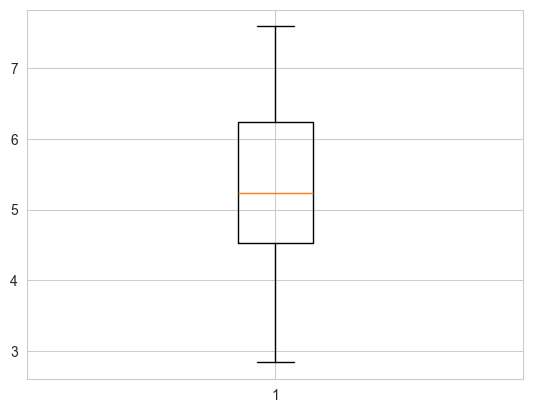

In [568]:
# check outliers 


plt.boxplot(df15['Score'])
plt.show()


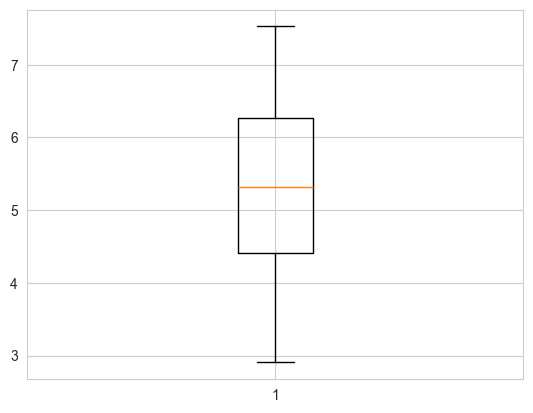

In [569]:
# check outliers 



plt.boxplot(df16['Score'])
plt.show()


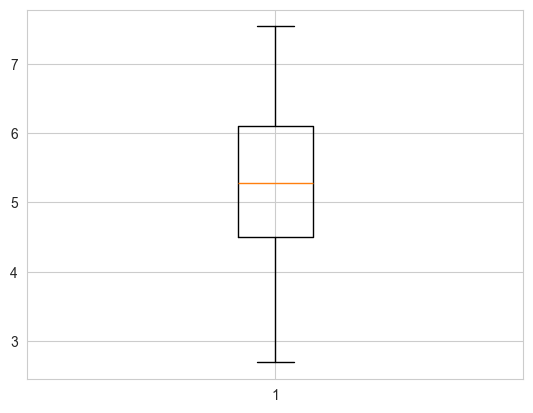

In [570]:
# check outliers 




plt.boxplot(df17['Score'])
plt.show()


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [571]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [572]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [573]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [574]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [575]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [576]:
df15['year'] = 2015
df16['year'] = 2016
df17['year'] = 2017

df17 = df17.merge(df16[['Country', 'Region']], on='Country', how='left')


merged_df = pd.concat([df15,df16,df17])

merged_df

,Country,Region,Rank,Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.51738,2015,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.70201,2015,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.49204,2015,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.46531,2015,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.45176,2015,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,151,3.471,NaN,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,NaN,2017,NaN,NaN,3.543030,3.398970,0.540061
151,Syria,Middle East and Northern Africa,152,3.462,NaN,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,NaN,2017,NaN,NaN,3.663669,3.260331,1.061574
152,Tanzania,Sub-Saharan Africa,153,3.349,NaN,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,NaN,2017,NaN,NaN,3.461430,3.236570,0.621130
153,Burundi,Sub-Saharan Africa,154,2.905,NaN,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,NaN,2017,NaN,NaN,3.074690,2.735310,1.683024


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

In [577]:
top10 = merged_df[merged_df['Rank'] <= 10].sort_values(by=['year', 'Rank'])


We could also use a correlation matrix to get more specific information about the relationship between these two variables.

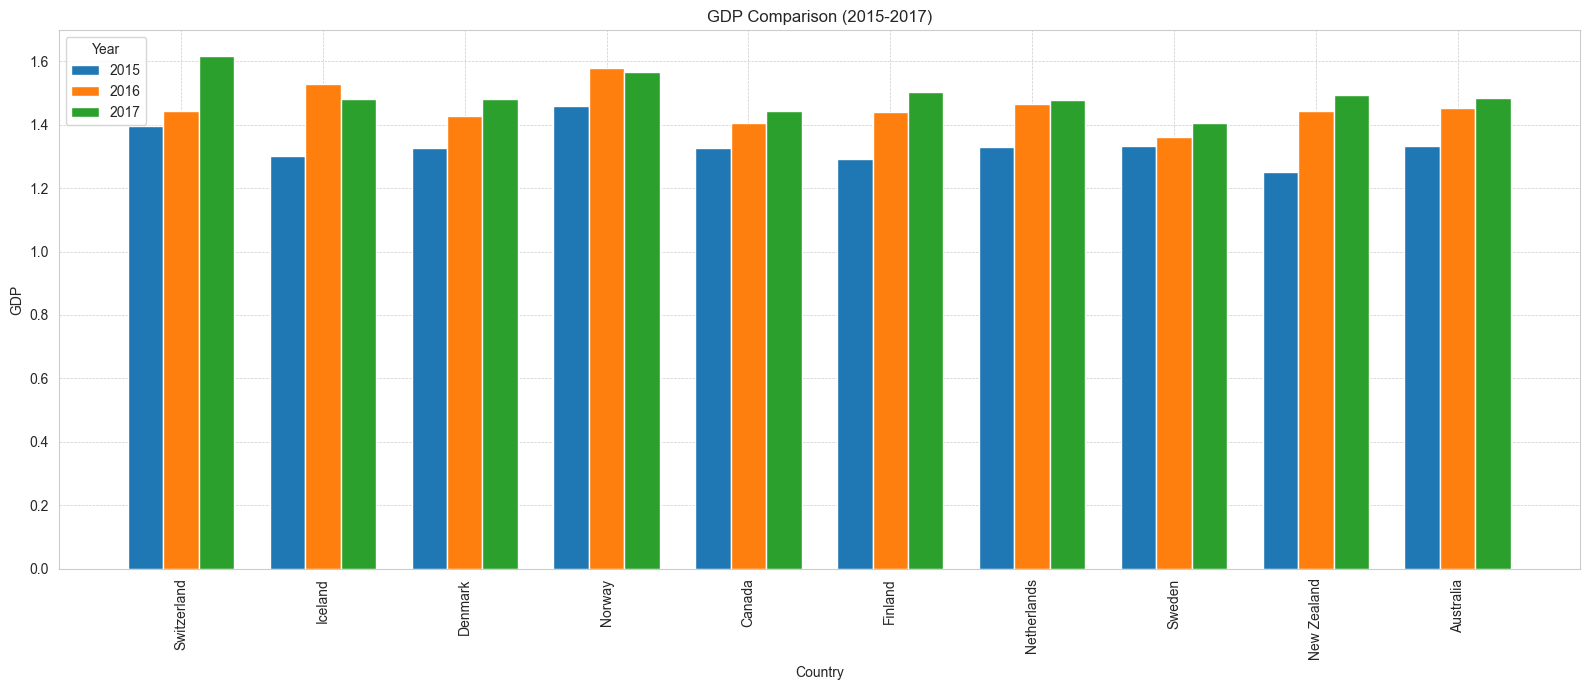

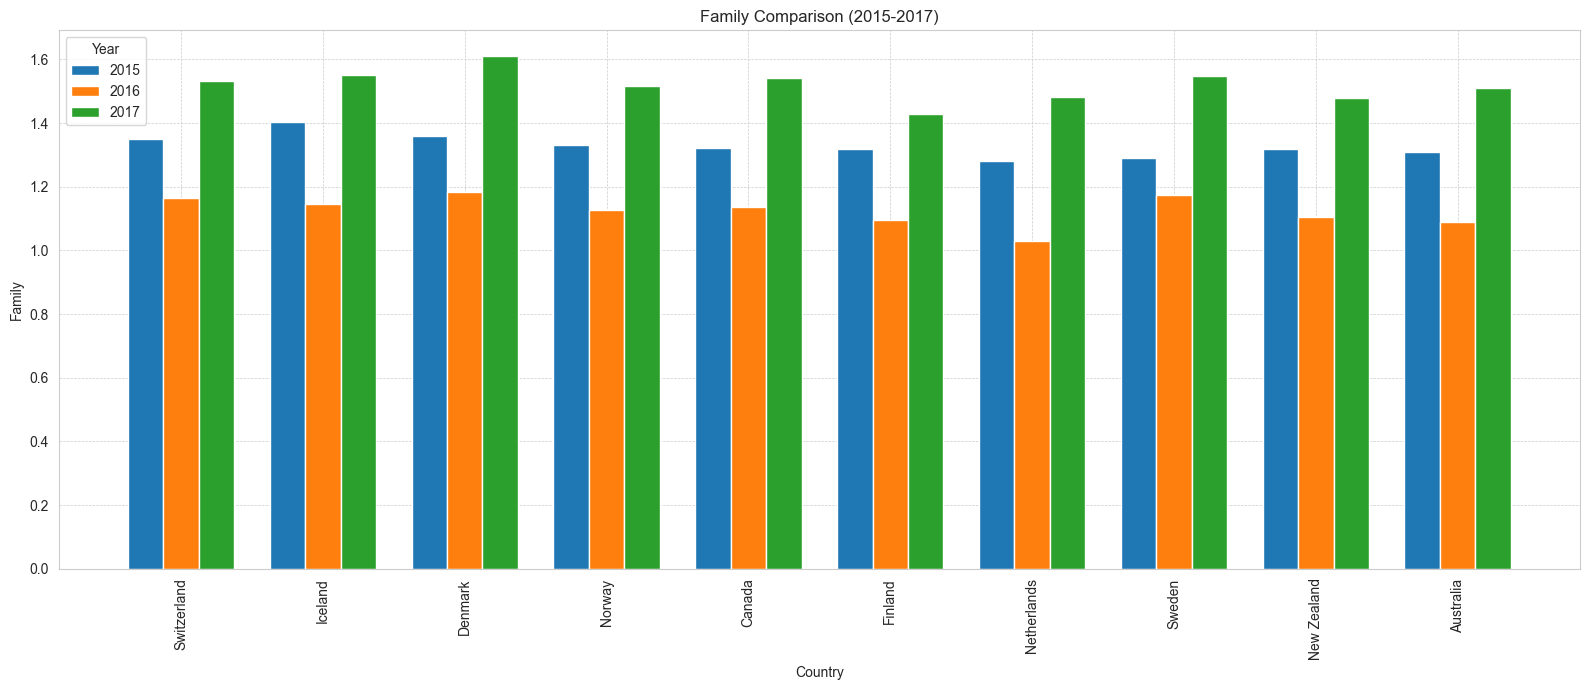

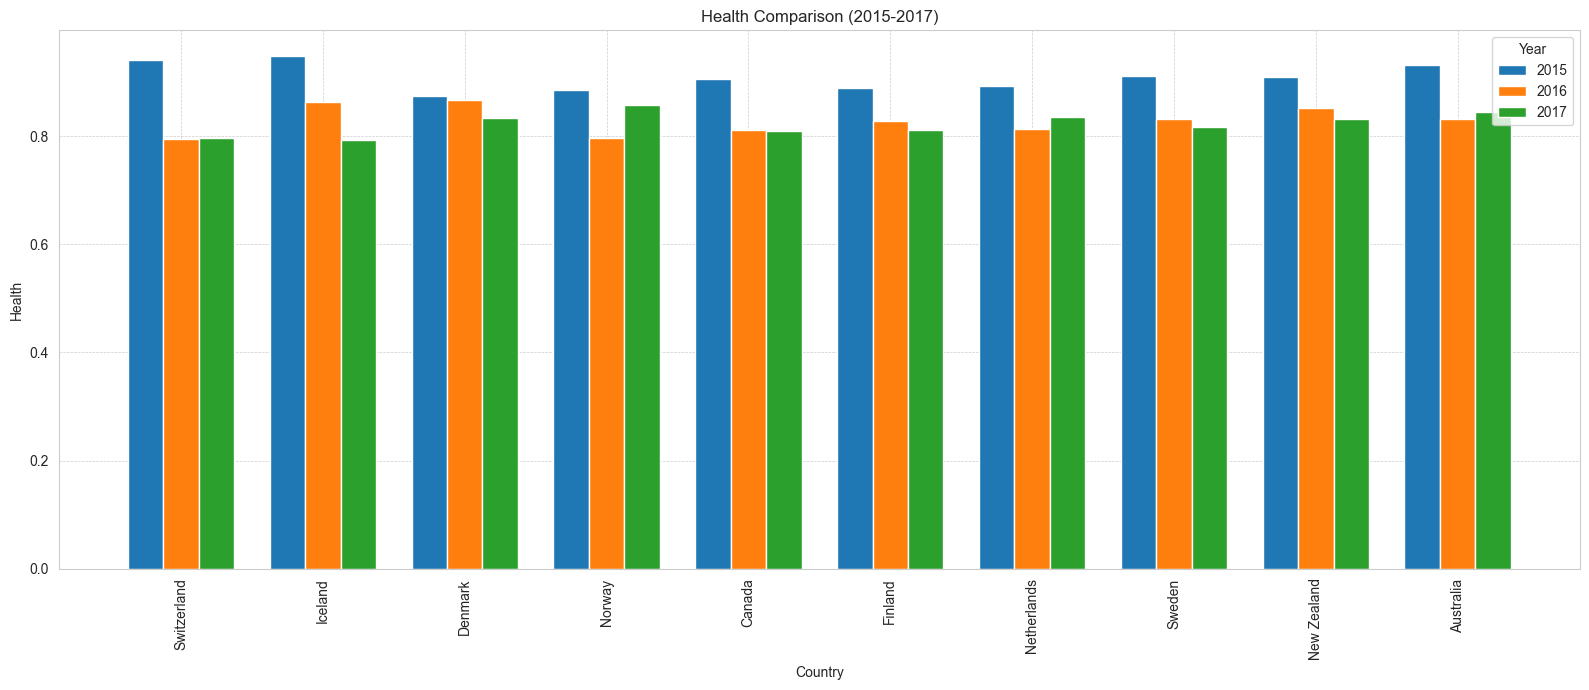

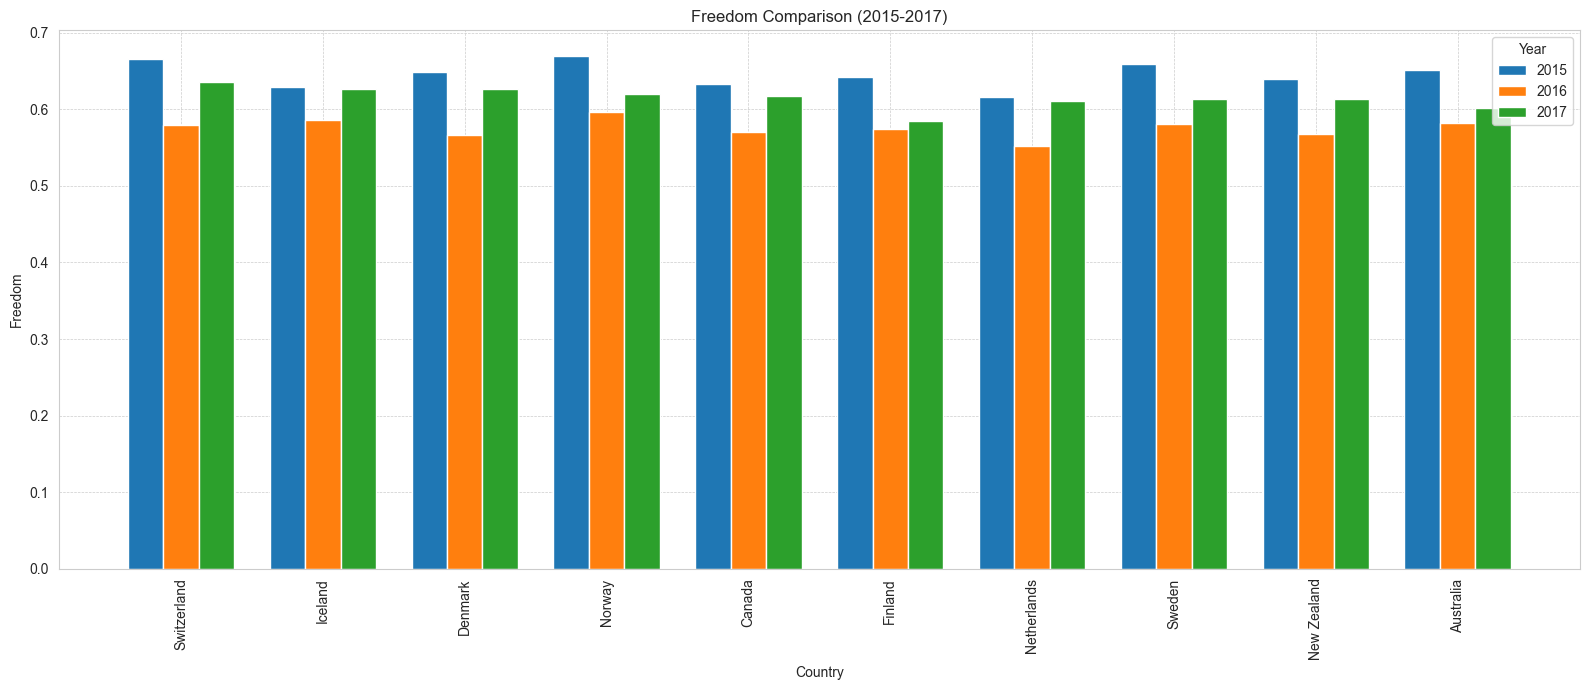

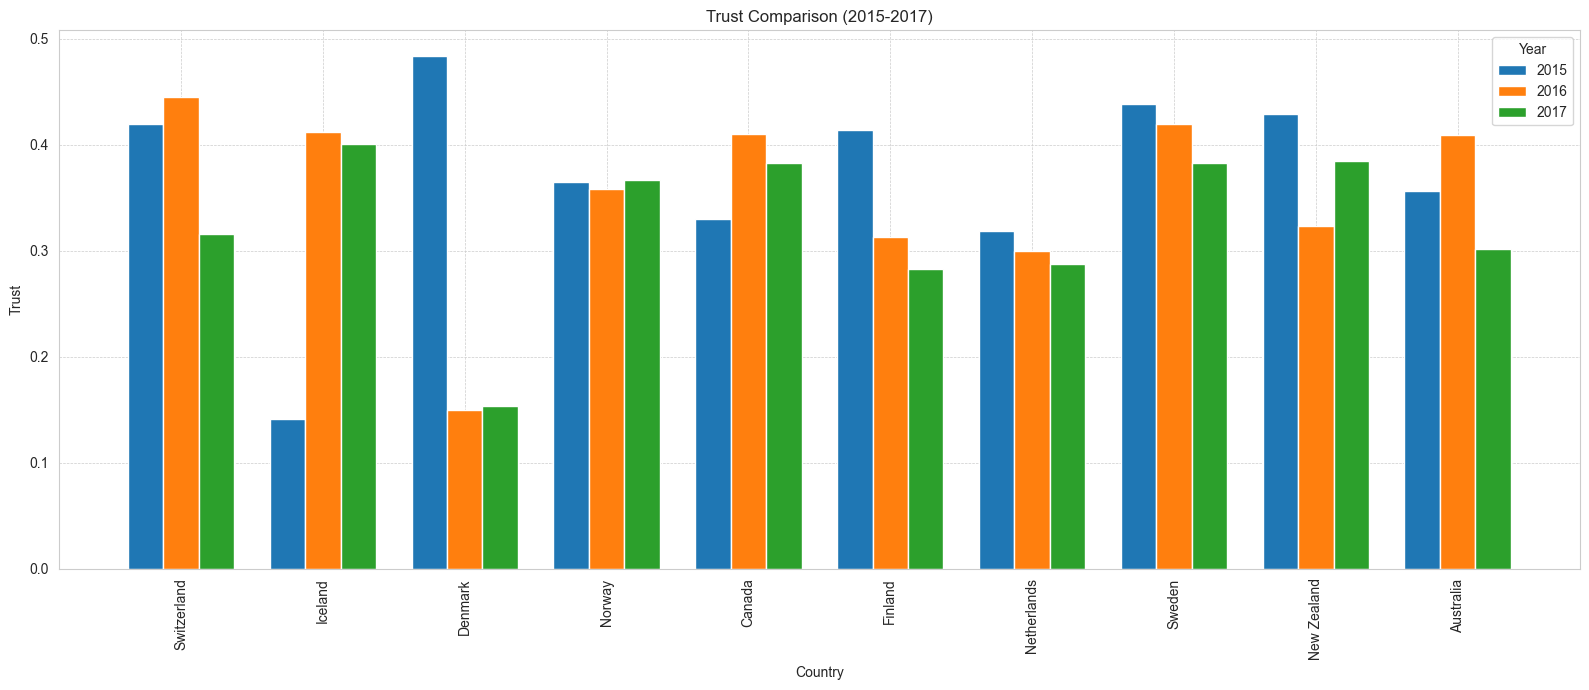

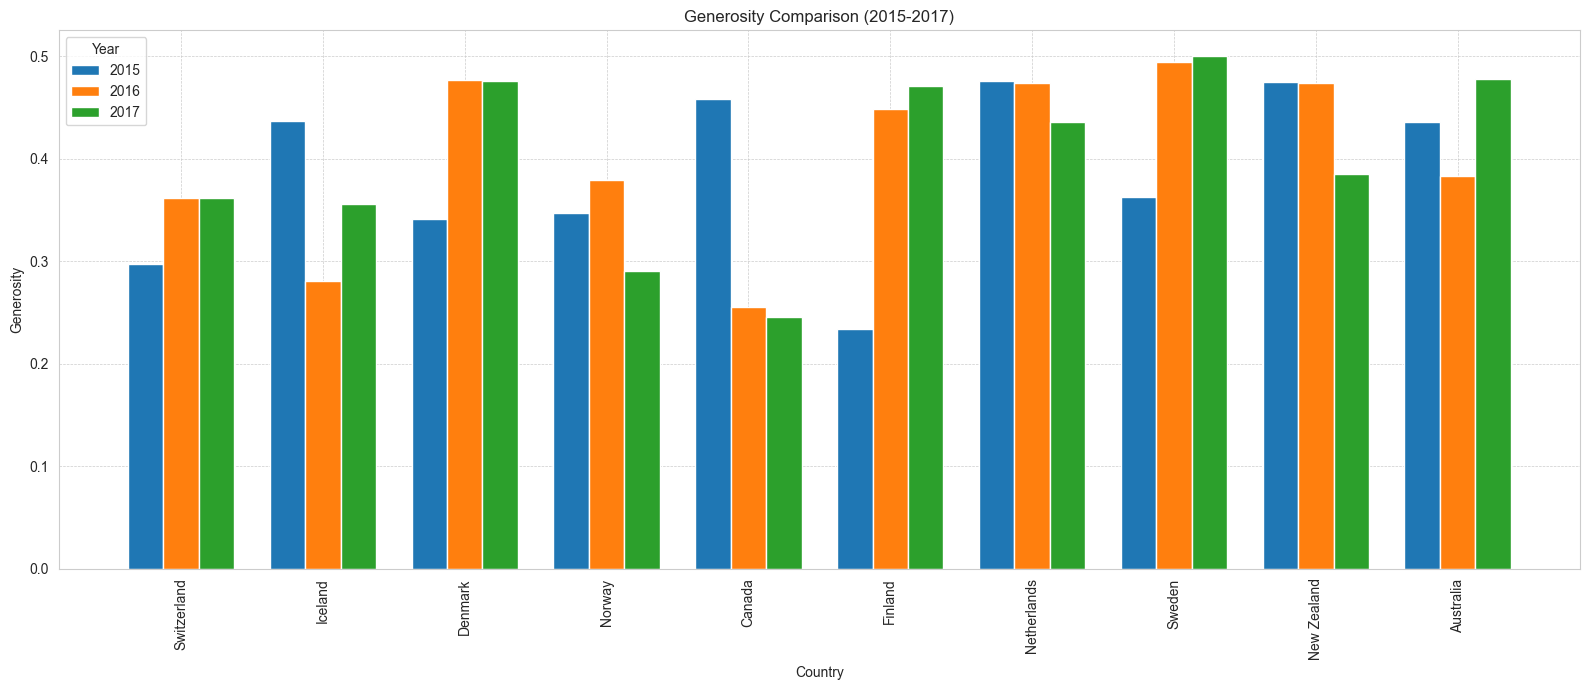

In [578]:


factors = ['GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

# Create a colormap for visual distinction
cmap = plt.cm.tab10  # Choose a colormap that suits your data and aesthetics

for i, factor in enumerate(factors):
    fig, ax = plt.subplots(figsize=(16, 7))
    width = 0.25  # Adjust bar width for clarity

    # Extract unique countries and years
    unique_countries = top10['Country'].unique()
    years = top10['year'].unique()

    # Create bar positions considering multiple years
    x = np.arange(len(unique_countries))
    bar_positions = [x + (j * width) for j in range(len(years))]  # List of bar positions

    # Iterate through years and create bars with distinct colors
    for j, year in enumerate(years):
        subset = top10[top10['year'] == year]
        ax.bar(bar_positions[j], subset[factor], width, label=str(year), color=cmap(j))  # Use colormap

    # Add legend, title, labels
    ax.legend(title='Year')
    ax.set_title(f'{factor} Comparison (2015-{years[-1]})')  # Update title with last year
    ax.set_xlabel('Country')
    ax.set_ylabel(factor)

    # Set x-axis ticks and labels at the center of bars
    ax.set_xticks(np.mean(bar_positions, axis=0))  # Average bar positions for centered labels
    ax.set_xticklabels(unique_countries, rotation=90)

    # Improve readability with gridlines and tight layout
    ax.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.show()


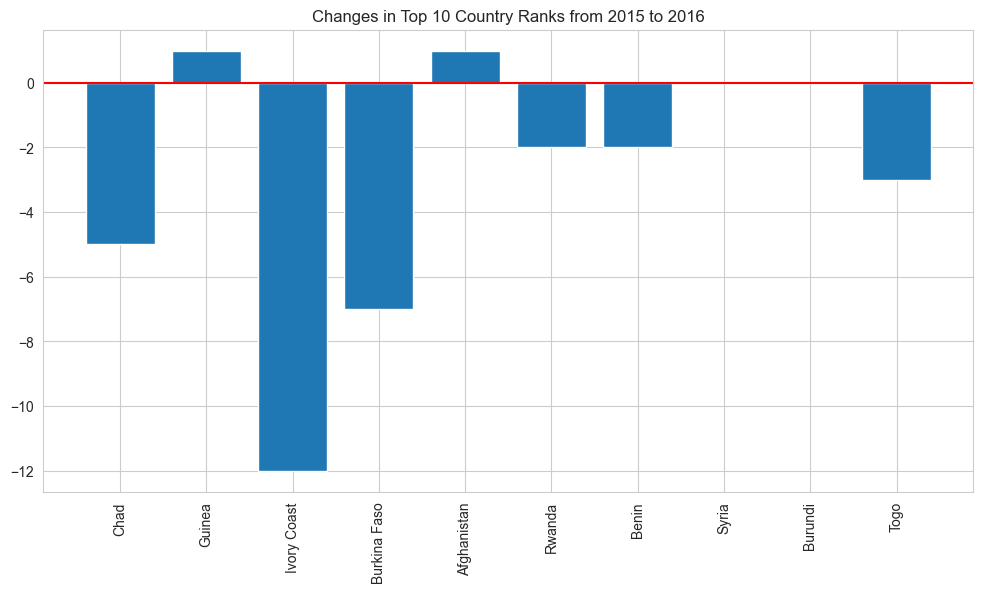

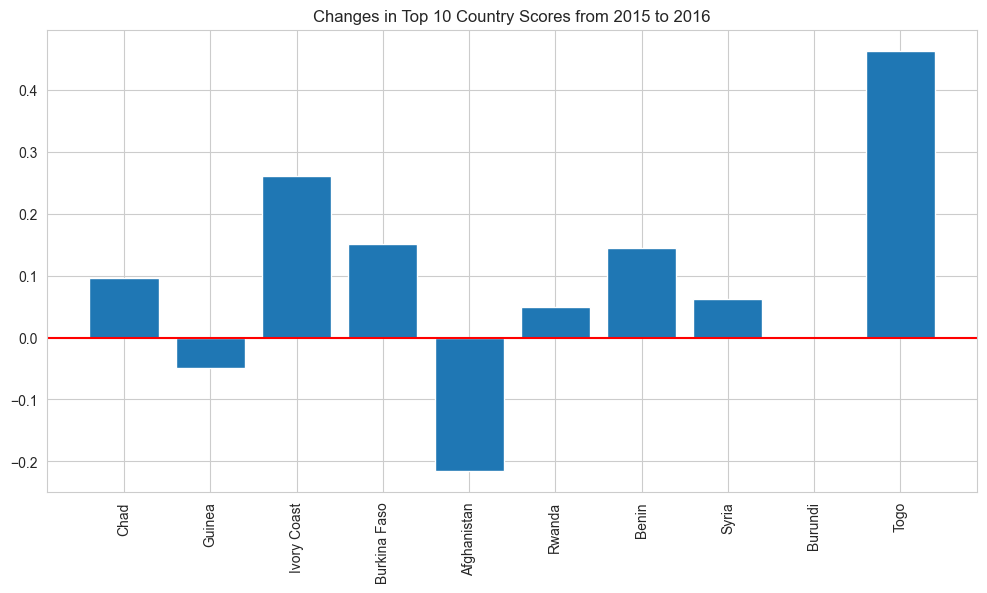

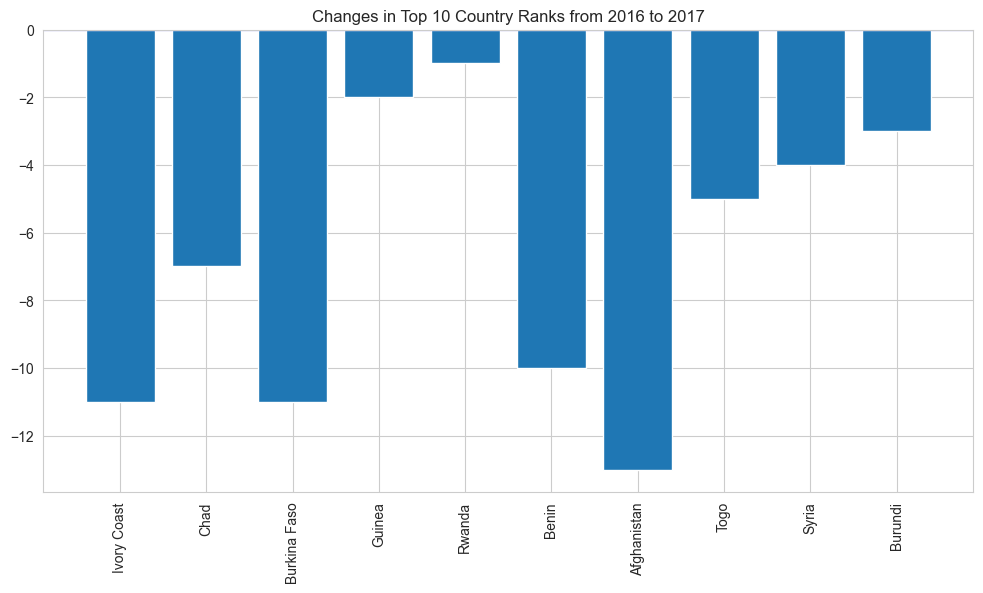

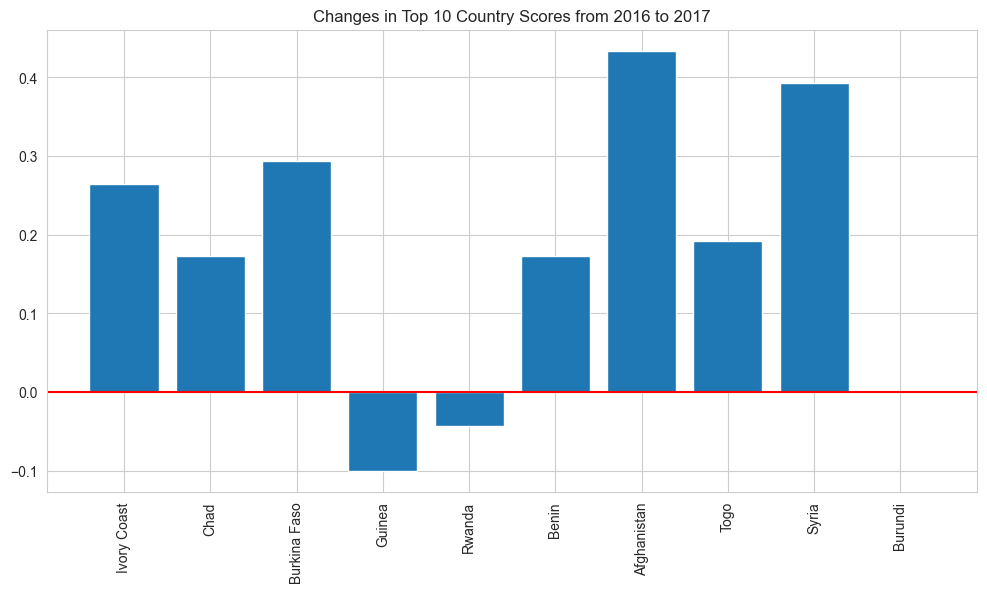

In [579]:
# Compare 2015 and 2016 for the top 10 countries
top_10_countries = df15.nlargest(10, 'Rank')['Country'].tolist()
df_2015_2016 = pd.merge(df15.loc[df15['Country'].isin(top_10_countries), ['Country', 'Rank', 'Score']], 
                        df16.loc[df16['Country'].isin(top_10_countries), ['Country', 'Rank', 'Score']], 
                        on='Country', how='outer', suffixes=('_2015', '_2016'))
df_2015_2016['Rank_Change'] = df_2015_2016['Rank_2016'] - df_2015_2016['Rank_2015']
df_2015_2016['Score_Change'] = df_2015_2016['Score_2016'] - df_2015_2016['Score_2015']

# Rank change plot for the top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(df_2015_2016['Country'], df_2015_2016['Rank_Change'])
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in Top 10 Country Ranks from 2015 to 2016')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Score change plot for the top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(df_2015_2016['Country'], df_2015_2016['Score_Change'])
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in Top 10 Country Scores from 2015 to 2016')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Compare 2016 and 2017 for the top 10 countries
df_2016_2017 = pd.merge(df16.loc[df16['Country'].isin(top_10_countries), ['Country', 'Rank', 'Score']], 
                        df17.loc[df17['Country'].isin(top_10_countries), ['Country', 'Rank', 'Score']], 
                        on='Country', how='outer', suffixes=('_2016', '_2017'))
df_2016_2017['Rank_Change'] = df_2016_2017['Rank_2017'] - df_2016_2017['Rank_2016']
df_2016_2017['Score_Change'] = df_2016_2017['Score_2017'] - df_2016_2017['Score_2016']

# Rank change plot for the top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(df_2016_2017['Country'], df_2016_2017['Rank_Change'])
plt.axhline(y=0, color='b', linestyle='-')
plt.title('Changes in Top 10 Country Ranks from 2016 to 2017')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Score change plot for the top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(df_2016_2017['Country'], df_2016_2017['Score_Change'])
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in Top 10 Country Scores from 2016 to 2017')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

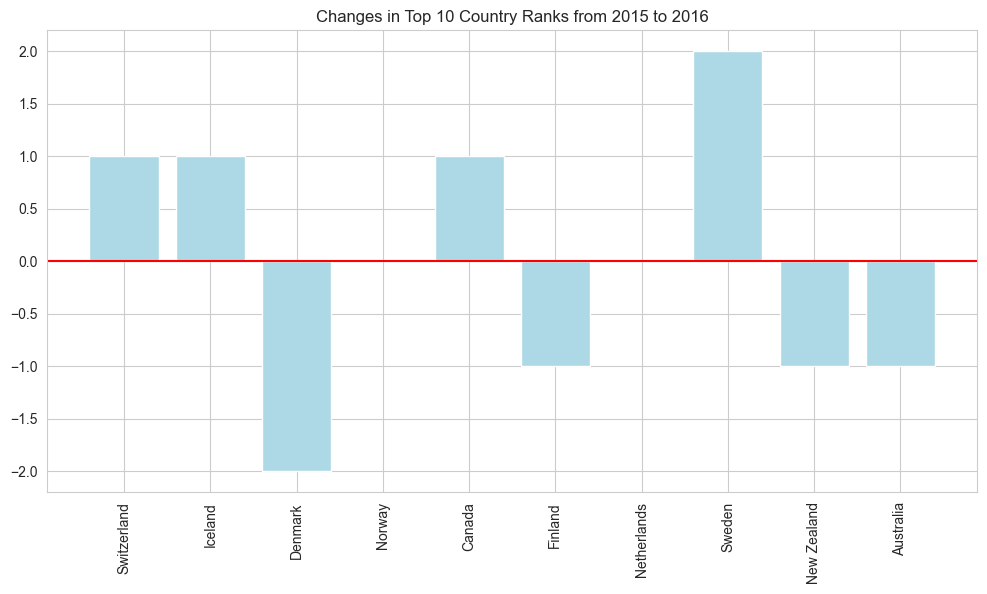

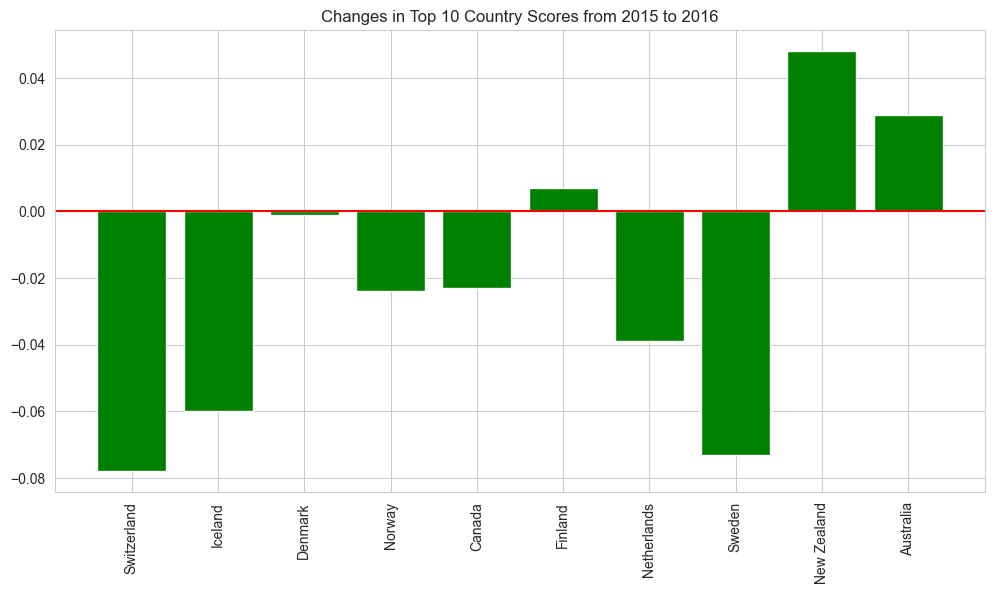

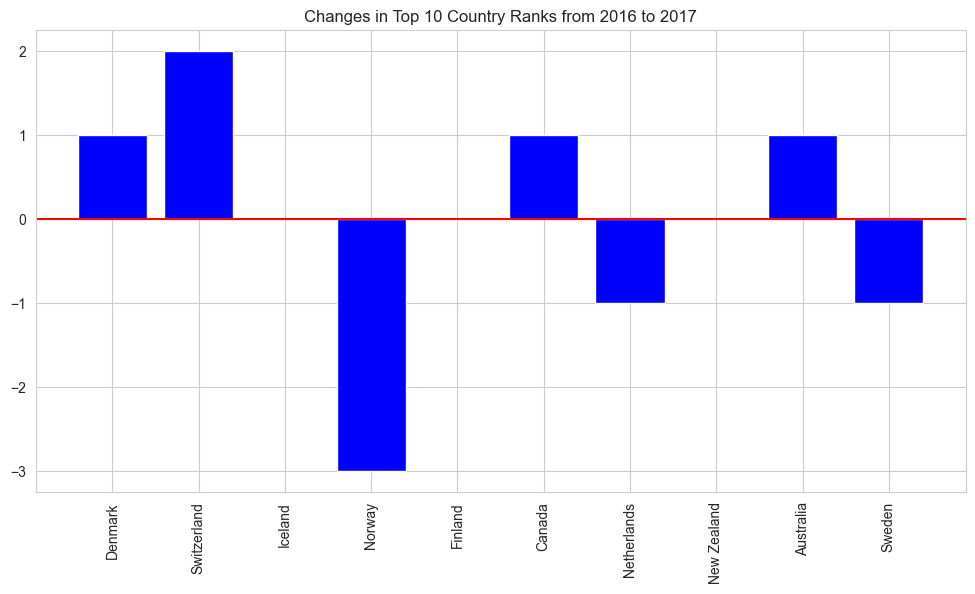

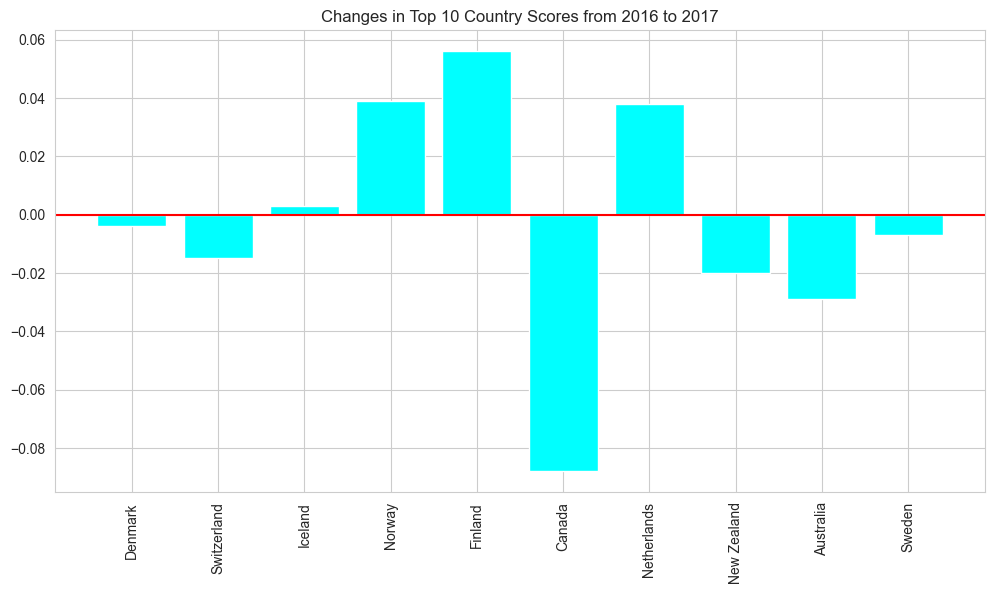

In [580]:
# Compare 2015 and 2016
df_2015_2016 = pd.merge(df15[['Country', 'Rank', 'Score']].head(10), df16[['Country', 'Rank', 'Score']].head(10), on='Country', how='outer', suffixes=('_2015', '_2016'))
df_2015_2016['Rank_Change'] = df_2015_2016['Rank_2016'] - df_2015_2016['Rank_2015']
df_2015_2016['Score_Change'] = df_2015_2016['Score_2016'] - df_2015_2016['Score_2015']

# Rank change plot
plt.figure(figsize=(12, 6))
plt.bar(df_2015_2016['Country'], df_2015_2016['Rank_Change'], color='lightblue')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in Top 10 Country Ranks from 2015 to 2016')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Score change plot
plt.figure(figsize=(12, 6))
plt.bar(df_2015_2016['Country'], df_2015_2016['Score_Change'], color='green')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in Top 10 Country Scores from 2015 to 2016')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Compare 2016 and 2017
df_2016_2017 = pd.merge(df16[['Country', 'Rank', 'Score']].head(10), df17[['Country', 'Rank', 'Score']].head(10), on='Country', how='outer', suffixes=('_2016', '_2017'))
df_2016_2017['Rank_Change'] = df_2016_2017['Rank_2017'] - df_2016_2017['Rank_2016']
df_2016_2017['Score_Change'] = df_2016_2017['Score_2017'] - df_2016_2017['Score_2016']

# Rank change plot
plt.figure(figsize=(12, 6))
plt.bar(df_2016_2017['Country'], df_2016_2017['Rank_Change'], color='blue')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in Top 10 Country Ranks from 2016 to 2017')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Score change plot
plt.figure(figsize=(12, 6))
plt.bar(df_2016_2017['Country'], df_2016_2017['Score_Change'], color='cyan')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in Top 10 Country Scores from 2016 to 2017')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

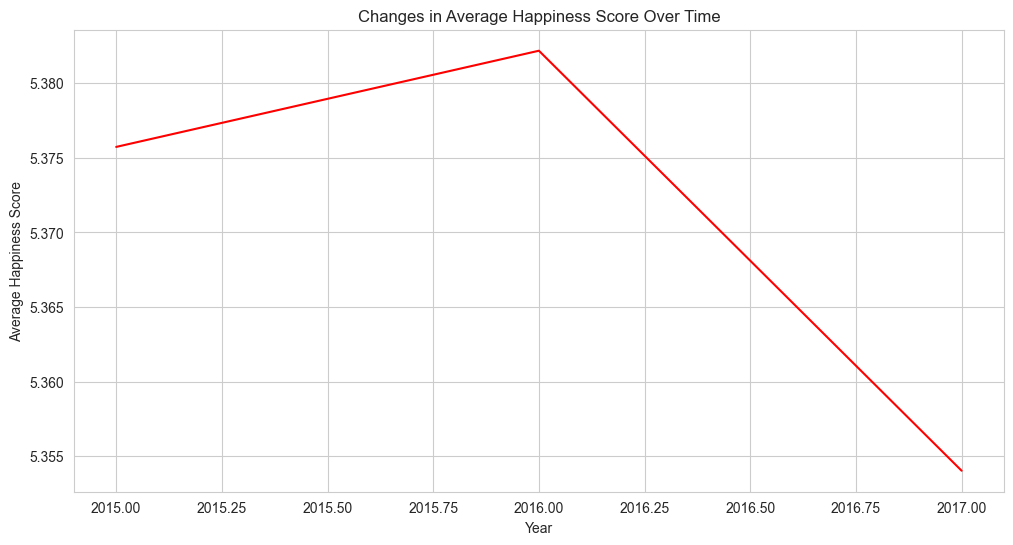

In [581]:

grouped_df = merged_df.groupby('year')['Score'].mean().reset_index()

# Create a line plot to show the changes in average happiness score over time
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['year'], grouped_df['Score'],color='red')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Changes in Average Happiness Score Over Time')
plt.grid(True)
plt.show()

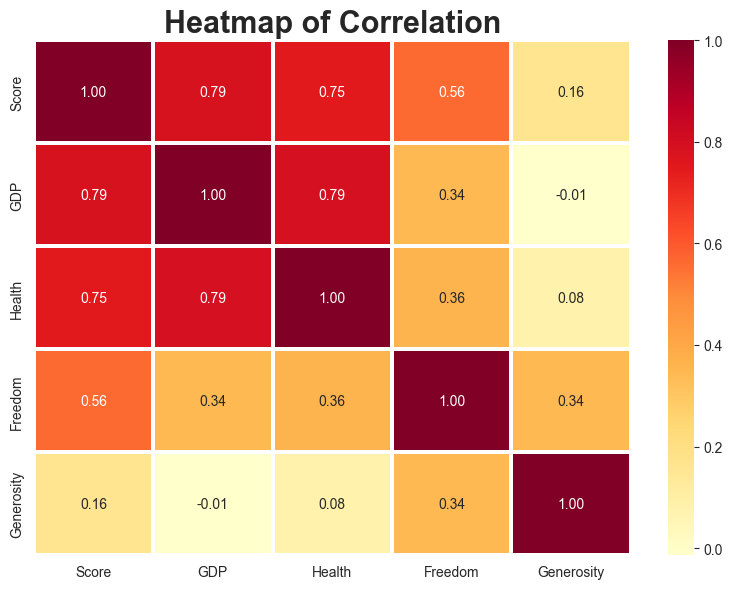

In [582]:


# Assuming merged_df 

coor = ['Score', 'GDP', 'Health', 'Freedom', 'Generosity']
correlation= merged_df[coor].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='YlOrRd', cbar=True, linewidths=1.5)

plt.title('Heatmap of Correlation', fontweight='bold', fontsize=22)

plt.tight_layout()
plt.show()